In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import seaborn as sns


In [2]:
df = pd.read_csv("../Resources/creditcardfraud_normalised.csv")
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,0.510600,...,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0
1,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,0.505267,...,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0
2,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,0.513018,...,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0
3,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,0.507585,...,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0
4,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,0.524303,...,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.756448,0.873531,0.666991,0.160317,0.729603,0.236810,0.235393,0.863749,0.528729,0.598850,...,0.564920,0.515249,0.680500,0.313600,0.658558,0.466291,0.433929,0.329840,0.000030,0
284803,0.945845,0.766677,0.872678,0.219189,0.771561,0.273661,0.265504,0.788548,0.482925,0.488530,...,0.564933,0.553154,0.665619,0.245298,0.543855,0.360884,0.417775,0.312038,0.000965,0
284804,0.990905,0.764080,0.781102,0.227202,0.783425,0.293496,0.263547,0.792985,0.477677,0.498692,...,0.565220,0.537005,0.664877,0.468492,0.592823,0.411176,0.416593,0.312585,0.002642,0
284805,0.954209,0.772856,0.849587,0.282508,0.763172,0.269291,0.261175,0.792671,0.476287,0.500464,...,0.565755,0.547353,0.663008,0.398836,0.545958,0.514746,0.418520,0.315245,0.000389,0


In [3]:
from collections import Counter
#
target = df.values[:, -1]
counter = Counter(target)
for k,v in counter.items():
  per = v/len(target)*100
  print("Class=%d, Count=%d, Percentage=%.3f%%" % (k,v, per))

Class=0, Count=284315, Percentage=99.827%
Class=1, Count=492, Percentage=0.173%


In [4]:
Class_count = df["class"].value_counts()
Class_count

0    284315
1       492
Name: class, dtype: int64

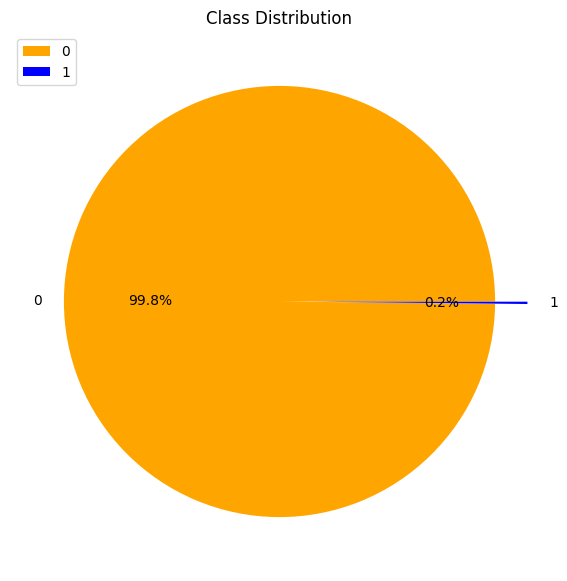

In [5]:
label= Class_count.index
count= Class_count.values
color = ['Orange','Blue']
explode = (0, 0.15)
plt.figure(1, figsize=(15,7))
plt.pie(count, labels=label, colors=color, autopct='%1.1f%%', explode=explode)
plt.legend(loc = 2)
plt.title('Class Distribution')
plt.show()

In [6]:
# Assign X and y values
y = df["class"].values
X = df.drop(columns="class").values   

#Split the data into X_train, X_test, y_train, y_test
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
!pip install imbalanced-learn

  Using cached imbalanced_learn-0.10.1-py3-none-any.whl (226 kB)

[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


## Random Oversampling Imbalanced Datasets

In [10]:
import imblearn
print(imblearn.__version__)

0.10.1


In [11]:
# define oversampling strategy
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')

In [15]:
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)
# summarize class distribution
print(Counter(y_over))

Counter({0: 284315, 1: 284315})


In [23]:
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, random_state=42)

In [24]:
X_train.shape, X_test.shape

((426472, 29), (142158, 29))

In [25]:
# Fit a Random Forests classifier to the data
from sklearn.ensemble import RandomForestClassifier

# Step 1: Instantiate model
clf = RandomForestClassifier(random_state=1, n_estimators=500)

In [26]:
# Fit a Random Forests classifier to the data
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=1)

In [30]:
#Assess other metrics for this model in oversampled dataset
y_true = y_test
y_pred = clf.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71023
           1       1.00      1.00      1.00     71135

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158



## Random Undersampling Imbalanced Datasets

In [31]:
from imblearn.under_sampling import RandomUnderSampler
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

In [32]:
# fit and apply the transform
X_under, y_under = undersample.fit_resample(X, y)
# summarize class distribution
print(Counter(y_over))

Counter({0: 284315, 1: 284315})


In [35]:
# Split the data into X_train, X_test, y_train, y_test
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_under, y_under, random_state=42)

In [36]:
# Check the distribution of samples
X_train1.shape, X_test1.shape

((738, 29), (246, 29))

In [37]:
# Step 1: Instantiate model
clf_under = RandomForestClassifier(random_state=1, n_estimators=500)

In [42]:
# Fit a Random Forests classifier to the undersampled data
clf_under.fit(X_train1, y_train1)

RandomForestClassifier(n_estimators=500, random_state=1)

In [43]:
#Assess other metrics for this model in undersampled dataset
y_true1 = y_test1
y_pred1 = clf_under.predict(X_test1)
print(classification_report(y_true1, y_pred1))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       126
           1       0.97      0.87      0.92       120

    accuracy                           0.92       246
   macro avg       0.93      0.92      0.92       246
weighted avg       0.93      0.92      0.92       246



## SMOTETomek - Random Under and Over sampled Datasets

In [8]:
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=42)

In [9]:
# fit and apply the transform
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)
# summarize class distribution
print(Counter(y_resampled))

Counter({0: 284315, 1: 284315})


In [11]:
# Split the data into X_train, X_test, y_train, y_test
X_train0, X_test0, y_train0, y_test0 = train_test_split(X_resampled, y_resampled, random_state=42)

In [12]:
# Check the distribution of samples
X_train0.shape, X_test0.shape

((426472, 29), (142158, 29))

In [14]:
# Fit a Random Forests classifier to the data
from sklearn.ensemble import RandomForestClassifier
# Step 1: Instantiate model
clf_underover = RandomForestClassifier(random_state=1, n_estimators=500)

In [15]:
# Fit a Random Forests classifier to the SMOTETomek_sampled data
clf_underover.fit(X_train0, y_train0)

RandomForestClassifier(n_estimators=500, random_state=1)

In [16]:
#Assess other metrics for this model
y_true0 = y_test0
y_pred0 = clf_underover.predict(X_test0)
print(classification_report(y_true0, y_pred0))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71023
           1       1.00      1.00      1.00     71135

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158

